In [2]:
!pip install pandas

  Using cached pandas-2.2.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (89 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.3-cp313-cp313-macosx_11_0_arm64.whl (11.3 MB)
Using cached tzdata-2024.2-py2.py3-none-any.whl (346 kB)


In [64]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [ ]:
## Import Dependencies

In [74]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn as sns

In [2]:
## Getting Data

In [19]:
data = pd.read_csv('sonar-data.csv')

In [20]:
data.head()

,0.02,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.009,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [22]:
data.shape

(207, 61)

In [23]:
data.describe()

,0.02,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.009,0.0032
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,...,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.029208,0.038443,0.043837,0.054053,0.075105,0.104599,0.121591,0.134677,0.177361,0.208245,...,0.016034,0.013472,0.010729,0.010917,0.009300,0.008181,0.007771,0.007947,0.007936,0.006523
std,0.023038,0.033040,0.038521,0.046583,0.055669,0.059247,0.061897,0.085340,0.118311,0.134741,...,0.012027,0.009628,0.007071,0.007310,0.007103,0.005719,0.005756,0.006485,0.006196,0.005038
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013300,0.016400,0.018900,0.024450,0.037700,0.066950,0.080600,0.080350,0.096750,0.111150,...,0.008350,0.007350,0.005050,0.005350,0.004100,0.004400,0.003700,0.003600,0.003650,0.003100
50%,0.022800,0.030800,0.034200,0.044100,0.062000,0.092100,0.105600,0.111900,0.152200,0.181000,...,0.013800,0.011500,0.009600,0.009300,0.007500,0.006800,0.005900,0.005800,0.006300,0.005300
75%,0.035800,0.048100,0.058200,0.065700,0.101050,0.134150,0.153050,0.169800,0.231500,0.269000,...,0.020700,0.016750,0.014900,0.014450,0.012100,0.010350,0.010350,0.010400,0.010350,0.008550
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [21]:
data['R'].value_counts()

R
M    111
R     96
Name: count, dtype: int64

In [24]:
data.groupby('R').mean()

,0.02,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.009,0.0032
R,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022524,0.030232,0.035879,0.041664,0.061680,0.096199,0.113767,0.117153,0.135584,0.158785,...,0.012198,0.010533,0.009673,0.009451,0.008581,0.007333,0.007708,0.006659,0.007058,0.006053


In [ ]:
## Seperating Data and Labels

In [25]:
X = data.drop(columns='R', axis=1)
y = data['R']

In [27]:
y

0      R
1      R
2      R
3      R
4      R
      ..
202    M
203    M
204    M
205    M
206    M
Name: R, Length: 207, dtype: object

## Splitting Data

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
y_test

161    M
15     R
73     R
96     M
166    M
      ..
5      R
132    M
56     R
127    M
115    M
Name: R, Length: 63, dtype: object

In [30]:
## Train the Model 

In [84]:
model = LogisticRegressionCV(cv=5, random_state=0, max_iter=1000)

In [85]:
model.fit(X_train, y_train)

LogisticRegressionCV(cv=5, max_iter=1000, random_state=0)

In [86]:
predictions = model.predict(X_test)
predictions

array(['M', 'R', 'R', 'R', 'R', 'R', 'R', 'M', 'M', 'M', 'M', 'R', 'M',
       'M', 'M', 'M', 'R', 'R', 'R', 'R', 'M', 'M', 'M', 'R', 'R', 'M',
       'R', 'R', 'M', 'M', 'R', 'R', 'R', 'M', 'M', 'R', 'R', 'M', 'R',
       'M', 'R', 'R', 'R', 'M', 'R', 'M', 'R', 'M', 'R', 'R', 'R', 'M',
       'R', 'M', 'R', 'R', 'M', 'R', 'R', 'M', 'R', 'M', 'M'],
      dtype=object)

In [37]:
print('Accuracy on training data : ', accuracy_score(predictions, y_test))

Accuracy on training data :  0.746031746031746


In [38]:
## Predict Values

In [70]:
input_data = (0.0156,0.0210,0.0282,0.0596,0.0462,0.0779,0.1365,0.0780,0.1038,0.1567,0.2476,0.2783,0.2896,0.2956,0.3189,0.1892,0.1730,0.2226,0.2427,0.3149,0.4102,0.3808,0.4896,0.6292,0.7519,0.7985,0.8830,0.9915,0.9223,0.6981,0.6167,0.5069,0.3921,0.3524,0.2183,0.1245,0.1592,0.1626,0.2356,0.2483,0.2437,0.2715,0.1184,0.1157,0.1449,0.1883,0.1954,0.1492,0.0511,0.0155,0.0189,0.0150,0.0060,0.0082,0.0091,0.0038,0.0056,0.0056,0.0048,0.0024)

# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)

print(prediction)

if (prediction[0]=='R'):
  print('The object is a Rock')
else:
  print('The object is a mine')

['R']
The object is a Rock


/opt/anaconda3/envs/log_reg_env/lib/python3.13/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


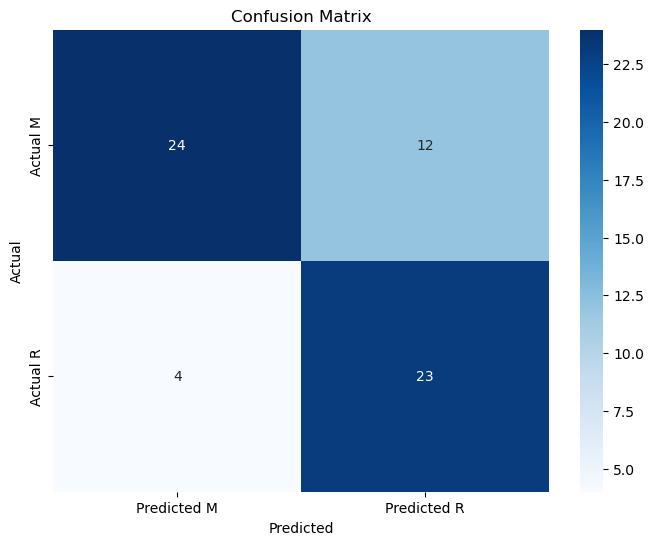

In [73]:
from sklearn.metrics import confusion_matrix

# Create confusion matrix
cm = confusion_matrix(y_test, predictions, labels=['M', 'R'])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d',
            cmap='Blues',
            xticklabels=['Predicted M', 'Predicted R'],
            yticklabels=['Actual M', 'Actual R'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()